# Лабораторна робота 2

## Лаврій Софія, АнД-41

In [1]:
from sklearn.datasets import make_regression
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
X, y = make_regression(n_samples=100000, 
                        n_features=22, 
                        n_informative=10, 
                        n_targets=1, 
                        noise=1.5,
                        random_state=2,
                        # shuffle=True,
                        # coef=True
                        )

Чомусь при розкоментуванні 2 нижніх параметрів перестає працювати і видає помилку "too many valuw to unpack (expected 2)"

In [10]:
df = pd.DataFrame(X, columns=[str(i)+' feature' for i in range(0, X.shape[1])])
df['target']=y
df

,0 feature,1 feature,2 feature,3 feature,4 feature,5 feature,6 feature,7 feature,8 feature,9 feature,...,13 feature,14 feature,15 feature,16 feature,17 feature,18 feature,19 feature,20 feature,21 feature,target
0,-0.701956,-0.075633,-0.516213,2.204265,1.297002,-1.487044,1.307235,0.299841,-1.457191,-1.470884,...,-0.344520,1.254184,-1.589355,-1.045580,-0.890536,0.598819,-1.424305,-0.275598,0.495802,202.748703
1,0.710091,-0.210104,-0.148550,-1.201869,0.501636,0.542591,0.209802,-1.078967,0.489771,0.100848,...,-2.269367,-0.210548,-0.797282,0.277036,-1.961373,0.091474,0.528874,0.253697,0.331207,-69.225089
2,0.334500,1.975089,-1.447948,-0.207774,-1.405157,0.103752,-0.284840,-0.536655,-0.543604,-1.001108,...,0.282371,1.365168,-0.934760,0.850636,0.615861,0.181491,-1.062753,0.269266,0.407387,-49.960601
3,-0.423266,-0.471356,0.602268,-1.257491,-0.553590,2.084704,-0.020765,0.607145,-0.378740,0.495780,...,1.728298,0.707498,-0.872445,1.293627,0.989215,0.307916,1.972701,-0.391022,-0.108485,238.741804
4,0.792349,1.367344,-2.038629,-0.576776,0.381103,-1.393307,1.827168,-0.253450,0.523090,-0.645539,...,-0.231770,-0.155649,-0.386534,-0.811130,1.010841,0.518727,0.950402,-0.741059,-0.140243,-119.064607
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,-1.080991,-1.882041,-0.203722,-0.162396,1.042212,-1.120999,0.547368,-1.596359,1.919576,1.349965,...,-1.488272,0.853147,-0.326654,0.564082,0.455699,-0.919436,-1.376226,0.776123,-0.030445,-79.277781
99996,-0.215370,-0.231347,1.539035,0.504656,0.509592,-0.682138,-1.051651,0.889230,-0.001221,-0.701495,...,0.946032,0.772746,-1.078161,0.504767,-0.974993,-1.229306,-1.140170,2.219410,1.641109,173.134118
99997,1.565757,1.321332,-0.723779,-2.240217,-1.647518,0.284488,-1.862510,-1.091775,-1.117446,0.286250,...,0.641764,0.735795,-1.686252,-0.714434,-1.440457,-0.302896,-0.733497,-0.131185,-0.385257,-117.276068
99998,0.569706,0.667942,-1.122753,0.430195,-0.917308,1.200591,-1.226303,0.531764,0.638691,2.241185,...,0.909044,1.527823,0.134112,0.272637,1.337396,0.739772,-1.057222,0.146524,-0.201149,254.701573


In [11]:
# df.to_csv('regression.csv')

In [12]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import mae ,mse
from tensorflow.keras.optimizers import SGD, Adam
import tensorflow as tf

## First and second models

#### 3 layers: 100 neurons, 50 neurons, 1 neuron

In [13]:
model = Sequential([
    Dense(100), 
    Dense(50),
    Dense(1)
]
) 

In [14]:
model.compile(
    loss=mae, 
    optimizer=SGD(), 
    metrics=[mae,mse]
)

first_model = model.fit(X, y, batch_size=256, epochs=10)

Epoch 1/10
391/391 [==============================] - 2s 2ms/step - loss: 33.1403 - mean_absolute_error: 33.1403 - mean_squared_error: 5045.5630
Epoch 2/10
391/391 [==============================] - 1s 2ms/step - loss: 7.8917 - mean_absolute_error: 7.8917 - mean_squared_error: 106.3250
Epoch 3/10
391/391 [==============================] - 1s 2ms/step - loss: 7.8712 - mean_absolute_error: 7.8712 - mean_squared_error: 105.2604
Epoch 4/10
391/391 [==============================] - 1s 2ms/step - loss: 7.8459 - mean_absolute_error: 7.8459 - mean_squared_error: 105.7864
Epoch 5/10
391/391 [==============================] - 1s 2ms/step - loss: 7.8608 - mean_absolute_error: 7.8608 - mean_squared_error: 105.7418
Epoch 6/10
391/391 [==============================] - 1s 3ms/step - loss: 7.8738 - mean_absolute_error: 7.8738 - mean_squared_error: 105.7172
Epoch 7/10
391/391 [==============================] - 1s 3ms/step - loss: 7.8876 - mean_absolute_error: 7.8876 - mean_squared_error: 106.1177
Epo

In [15]:
rows = len(df)
x_test = X[int(rows*0.8):]
y_test = y[int(rows*0.8):]
x_train = X[:int(rows*0.8)]  
y_train = y[:int(rows*0.8)]

In [16]:
y_pred = model.predict(x_test)

Text(0.5, 1.0, 'First model')

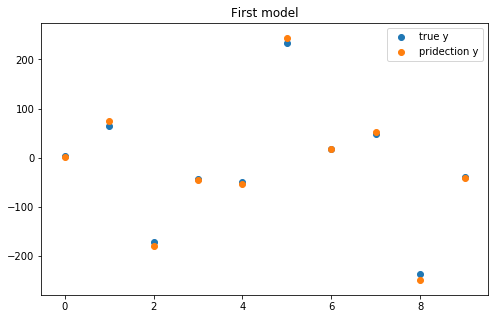

In [17]:
plt.figure(figsize=(8, 5))
plt.scatter(range(0, 10), y_test[:10], label='true y')
plt.scatter(range(0, 10), y_pred[:10], label='pridection y')
plt.legend()
plt.title('First model')

Text(0.5, 1.0, 'First model')

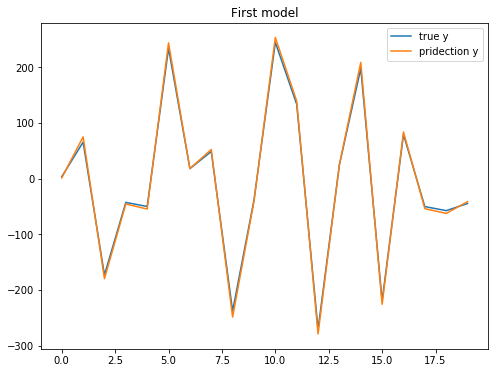

In [18]:
plt.figure(figsize=(8, 6))
plt.plot(range(0, 20), y_test[:20], label='true y')
plt.plot(range(0, 20), y_pred[:20], label='pridection y')
plt.legend()
plt.title('First model')

In [19]:
print('First model prediction: {}'.format(y_pred[-1:][0]))
print('True value: {}'.format(y_test[-1:]))

First model prediction: [70.48719]
True value: [65.31454167]


In [20]:
model2 = model

model2.compile(
    loss=mae, 
    optimizer=SGD(), 
    metrics=[mae,mse]
)

second_model = model2.fit(x_train,y_train, 
           validation_data=(x_test,y_test), 
           batch_size=256,
           epochs=10)

Epoch 1/10
313/313 [==============================] - 2s 5ms/step - loss: 7.8257 - mean_absolute_error: 7.8257 - mean_squared_error: 105.2888 - val_loss: 10.4467 - val_mean_absolute_error: 10.4467 - val_mean_squared_error: 171.0238
Epoch 2/10
313/313 [==============================] - 1s 3ms/step - loss: 7.9147 - mean_absolute_error: 7.9147 - mean_squared_error: 106.9125 - val_loss: 6.5752 - val_mean_absolute_error: 6.5752 - val_mean_squared_error: 67.5046
Epoch 3/10
313/313 [==============================] - 1s 3ms/step - loss: 7.8843 - mean_absolute_error: 7.8843 - mean_squared_error: 105.6154 - val_loss: 10.8889 - val_mean_absolute_error: 10.8889 - val_mean_squared_error: 186.2257
Epoch 4/10
313/313 [==============================] - 1s 3ms/step - loss: 7.8664 - mean_absolute_error: 7.8664 - mean_squared_error: 105.3875 - val_loss: 6.3906 - val_mean_absolute_error: 6.3906 - val_mean_squared_error: 64.1922
Epoch 5/10
313/313 [==============================] - 1s 3ms/step - loss: 7.84

In [21]:
y_pred2 = model2.predict(x_test)

Text(0.5, 1.0, 'Comparison first and second model')

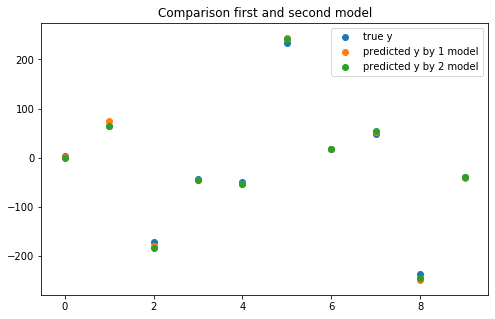

In [22]:
plt.figure(figsize=(8, 5))
plt.scatter(range(0, 10), y_test[:10], label='true y')
plt.scatter(range(0,10), y_pred[:10], label='predicted y by 1 model')
plt.scatter(range(0,10), y_pred2[:10], label='predicted y by 2 model')
plt.legend()
plt.title("Comparison first and second model")

Text(0.5, 1.0, 'Comparison first and second model')

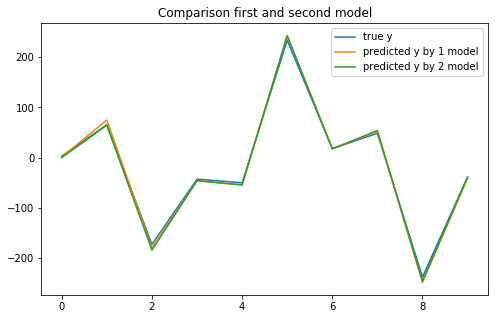

In [23]:
plt.figure(figsize=(8, 5))
plt.plot(range(0, 10), y_test[:10], label='true y')
plt.plot(range(0,10), y_pred[:10], label='predicted y by 1 model')
plt.plot(range(0,10), y_pred2[:10], label='predicted y by 2 model')
plt.legend()
plt.title("Comparison first and second model")

In [24]:
print('First model prediction: {}'.format(y_pred[-1:][0]))
print('Second model prediction: {}'.format(y_pred2[-1:][0]))
print('True value: {}'.format(y_test[-1:]))

First model prediction: [70.48719]
Second model prediction: [64.090576]
True value: [65.31454167]


## Third and fourth model

#### 2 layers: 11 neurons, 1 neuron

In [25]:
model3 = Sequential([
    Dense(10),
    Dense(1)
])

model3.compile(
    optimizer=Adam(),
    loss='mse',
    metrics=['mse', 'mae']
)

In [26]:
third_model = model3.fit(X, y, batch_size=256, epochs=10)

Epoch 1/10
391/391 [==============================] - 1s 2ms/step - loss: 24074.2500 - mse: 24074.2500 - mae: 123.6913
Epoch 2/10
391/391 [==============================] - 1s 2ms/step - loss: 19072.8672 - mse: 19072.8672 - mae: 109.9531
Epoch 3/10
391/391 [==============================] - 1s 2ms/step - loss: 11901.0547 - mse: 11901.0547 - mae: 86.6745
Epoch 4/10
391/391 [==============================] - 1s 2ms/step - loss: 5997.4102 - mse: 5997.4102 - mae: 61.4108
Epoch 5/10
391/391 [==============================] - 1s 2ms/step - loss: 2492.8267 - mse: 2492.8267 - mae: 39.4650
Epoch 6/10
391/391 [==============================] - 1s 2ms/step - loss: 856.0377 - mse: 856.0377 - mae: 23.0511
Epoch 7/10
391/391 [==============================] - 1s 2ms/step - loss: 240.3659 - mse: 240.3659 - mae: 12.1331
Epoch 8/10
391/391 [==============================] - 1s 2ms/step - loss: 58.5170 - mse: 58.5170 - mae: 5.9768
Epoch 9/10
391/391 [==============================] - 1s 2ms/step - loss:

In [27]:
y_pred3 = model3.predict(x_test)

Text(0.5, 1.0, 'Third model')

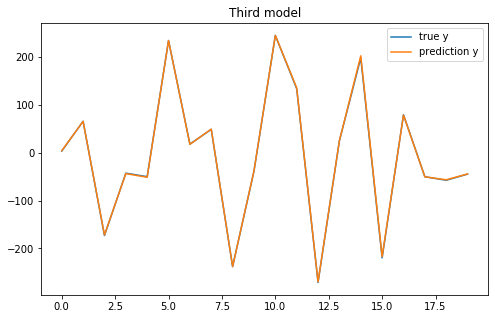

In [28]:
plt.figure(figsize=(8, 5))
plt.plot(range(0, 20), y_test[:20], label='true y')
plt.plot(range(0, 20), y_pred3[:20], label='prediction y')
plt.legend ()
plt.title("Third model")

In [29]:
print('Third model prediction: {}'.format(y_pred3[-1:][0]))
print('True value: {}'.format(y_test[-1:]))

Third model prediction: [63.5173]
True value: [65.31454167]


In [30]:
model4 = model3

model4.compile(
    optimizer=Adam(),
    loss='mse',
    metrics=['mse', 'mae']
)

In [31]:
fourth_model = model4.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=256, epochs=10)

Epoch 1/10
313/313 [==============================] - 1s 3ms/step - loss: 2.2798 - mse: 2.2798 - mae: 1.2035 - val_loss: 2.2926 - val_mse: 2.2926 - val_mae: 1.2095
Epoch 2/10
313/313 [==============================] - 1s 2ms/step - loss: 2.2651 - mse: 2.2651 - mae: 1.1997 - val_loss: 2.3182 - val_mse: 2.3182 - val_mae: 1.2154
Epoch 3/10
313/313 [==============================] - 1s 2ms/step - loss: 2.2666 - mse: 2.2666 - mae: 1.2001 - val_loss: 2.3023 - val_mse: 2.3023 - val_mae: 1.2125
Epoch 4/10
313/313 [==============================] - 1s 2ms/step - loss: 2.2669 - mse: 2.2669 - mae: 1.2001 - val_loss: 2.3217 - val_mse: 2.3217 - val_mae: 1.2169
Epoch 5/10
313/313 [==============================] - 1s 2ms/step - loss: 2.2701 - mse: 2.2701 - mae: 1.2011 - val_loss: 2.3045 - val_mse: 2.3045 - val_mae: 1.2121
Epoch 6/10
313/313 [==============================] - 1s 2ms/step - loss: 2.2646 - mse: 2.2646 - mae: 1.1998 - val_loss: 2.3078 - val_mse: 2.3078 - val_mae: 1.2146
Epoch 7/10
313/3

In [32]:
y_pred4 = model4.predict(x_test)

Text(0.5, 1.0, 'Fourth model')

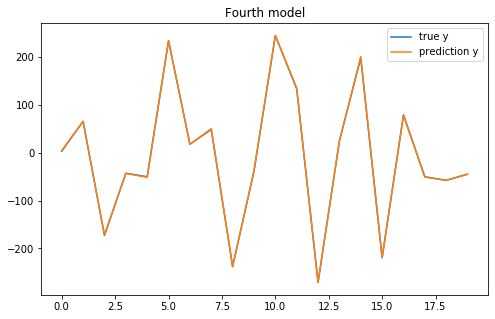

In [33]:
plt.figure(figsize=(8, 5))
plt.plot(range(0, 20), y_test[:20], label='true y')
plt.plot(range(0, 20), y_pred4[:20], label='prediction y')
plt.legend ()
plt.title('Fourth model')

In [35]:
print('Third model prediction: {}'.format(y_pred3[-1:][0]))
print('Fourth model prediction: {}'.format(y_pred4[-1:][0]))
print('True value: {}'.format(y_test[-1:]))

Third model prediction: [63.5173]
Fourth model prediction: [63.96561]
True value: [65.31454167]


# Висновок

Судячи з результатів, однозначно можна зробити висновок, що тренування нейронної мережі з валідаційними даними набагато краща, ніж без. На це вказують результати прогнозів моделей. Окрім того, для нашого випадку кращою були моделі 3 і 4, де менша кількість шарів та нейронів.